# Detection of Signals with Random Parameters

### System and Signal Modelling

We consider a communication system where a source transmits one of two possible signals over each interval $ T $. 

**Carrier and Signal Frequencies**

The signal is transmitted at a frequency $ f_i $, which is slightly offset from a central carrier frequency $ f_c $. 

This displacement from the carrier frequency allows the receiver to differentiate between two possible transmitted signals, effectively enabling binary modulation.

**Bandpass Signal Representation**

The transmitted signal $ s_i(t) $ is modeled as a bandpass signal:

$$
s_i(t) = a_i(t) \cos \left[ 2 \pi (f_i + f_c)t + \phi_i(t) \right], \quad i = 0, 1, \quad 0 \le t \le T
$$


where

- $ a_i(t) $ is the time-varying amplitude
-  $ \phi_i(t) $ is the time-varying phase. 

Together, these determine the envelope and phase shift of the signal, respectively, both of which can be modulated to carry information.

The signal is therefore a cosine wave oscillating at $ f_i + f_c $, and by modulating $ a_i(t) $ and $ \phi_i(t) $, it can represent either of the two possible signals (e.g., in binary signaling systems like BPSK).

**Baseband Equivalent Signal**

To simplify the analysis of this bandpass signal, we can represent it as a baseband signal. 

The baseband representation $ u_i(t) $ allows us to focus on the essential information contained within the signal without the high-frequency carrier.

The equivalent representation is:

$$
s_i(t) = \operatorname{Re} \left[ u_i(t)e^{j(2 \pi f_c t)} \right], \quad i = 0, 1, \quad 0 \le t \le T
$$

where $ u_i(t) $ is the baseband equivalent of $ s_i(t) $ at the lower frequency $ f_i $, rather than the higher carrier frequency $ f_c $.

**Complex Envelope**

$ u_i(t) $ is defined as:

$$
u_i(t) = a_i(t)e^{j(2 \pi f_i t + \phi_i(t))}, \quad i = 0, 1, \quad 0 \le t \le T
$$

This complex envelope $ u_i(t) $ carries the amplitude $ a_i(t) $ and phase $ \phi_i(t) $ information, while the complex exponential $ e^{j(2 \pi f_i t)} $ captures the modulation frequency $ f_i $.

During transmission, the signal may suffer an attenuation $ \alpha $ so that its received amplitude is $ \alpha a_i(t) $, its frequency may be altered by an amount $ f_d $ so that the received frequency is $ f_i + f_c + f_d $, its phase may be shifted by $ \beta $ radians, and it arrives at a relative time delay of $ t_0 $. 

Unknown frequency could be caused by, for example, Doppler effects causing $f_d$.

It is also received in the presence of noise, represented by its complex equivalent random process $ z(t) $. 

Thus, under hypothesis $ H_i $, the complex envelope of the received signal is

$$
y(t) = \alpha a_i(t - t_0) \exp \left[ j \left( 2 \pi (f_i + f_d)(t - t_0) + \phi_i(t - t_0) + \beta \right) \right] + z(t),
$$

where

$$
i = 0, 1, \quad t_0 \le t \le T + t_0
$$

We assume through most of this chapter that the noise $ z(t) $ is a complex Gaussian process. 


### Impairments and Noise

**Signal Attenuation $ \alpha $**:

During transmission, the signal’s amplitude may decrease due to path loss, shadowing, or fading effects. 

The attenuation factor $ \alpha $ reduces the transmitted amplitude $ a_i(t) $ to $ \alpha a_i(t) $ upon reception. 

This factor reflects the reduced signal strength over the transmission path, which affects the reliability of signal detection at the receiver.

**Frequency Shift $ f_d $**

The received signal frequency is altered to $ f_i + f_c + f_d $ due to $ f_d $, a Doppler shift resulting from relative motion between the transmitter and receiver (e.g., in mobile or satellite communications). 

This Doppler effect introduces uncertainty in the received frequency, complicating detection and synchronization as the receiver must account for $ f_d $ when attempting to extract the original frequency $ f_i + f_c $.

**Phase Shift $ \beta $**

The signal’s phase may be shifted by $ \beta $ radians due to propagation effects, such as multipath fading or reflections. 

This phase shift must be estimated or corrected for accurate demodulation, especially in phase-sensitive modulation schemes.

**Time Delay $ t_0 $**

The received signal arrives with a delay (time of arrival) $ t_0 $, resulting from the finite speed of signal propagation. 

This delay means that the received signal is a time-shifted version of the transmitted signal. 

Proper synchronization is necessary to account for $ t_0 $, particularly in systems requiring precise timing (e.g., time-division multiplexing or time-of-arrival-based localization).

**Noise $ z(t) $**:

The received signal is contaminated by noise, modeled as a complex Gaussian random process $ z(t) $. 

This noise represents thermal noise, interference, or other unpredictable random disturbances present in the communication channel. 

Since it’s complex Gaussian noise, $ z(t) $ affects both the real and imaginary components of the received signal, which adds uncertainty to the amplitude and phase of the received signal.

**Received Complex Envelope $ y(t) $ under Hypothesis $ H_i $**:

Under hypothesis $ H_i $, which denotes the transmission of signal $ s_i(t) $, the complex envelope of the received signal in a noisy, time-delayed, and frequency-shifted channel is given by:

$$
y(t) = \alpha a_i(t - t_0) \exp \left[ j \left( 2 \pi (f_i + f_d)(t - t_0) + \phi_i(t - t_0) + \beta \right) \right] + z(t),
$$

where

$$
i = 0, 1, \quad t_0 \le t \le T + t_0
$$

This signal models the cumulative effects on the received signal, accounting for amplitude attenuation, frequency shift, phase shift, time delay, and noise. 

#### Illustration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0             # Signal duration
fs = 1000           # Sampling frequency (samples per second)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Time vector

# Signal parameters
fc = 100            # Carrier frequency
f_i = 10            # Modulating frequency
a_i = 1.0           # Original amplitude
phi_i = 0           # Initial phase

# Channel impairments
alpha = 0.5         # Attenuation factor
f_d = 2             # Frequency shift (Doppler effect)
beta = np.pi / 4    # Phase shift (in radians)
t_0 = 0.2           # Time delay

# Generate original transmitted signal (without impairments)
s_i = a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)


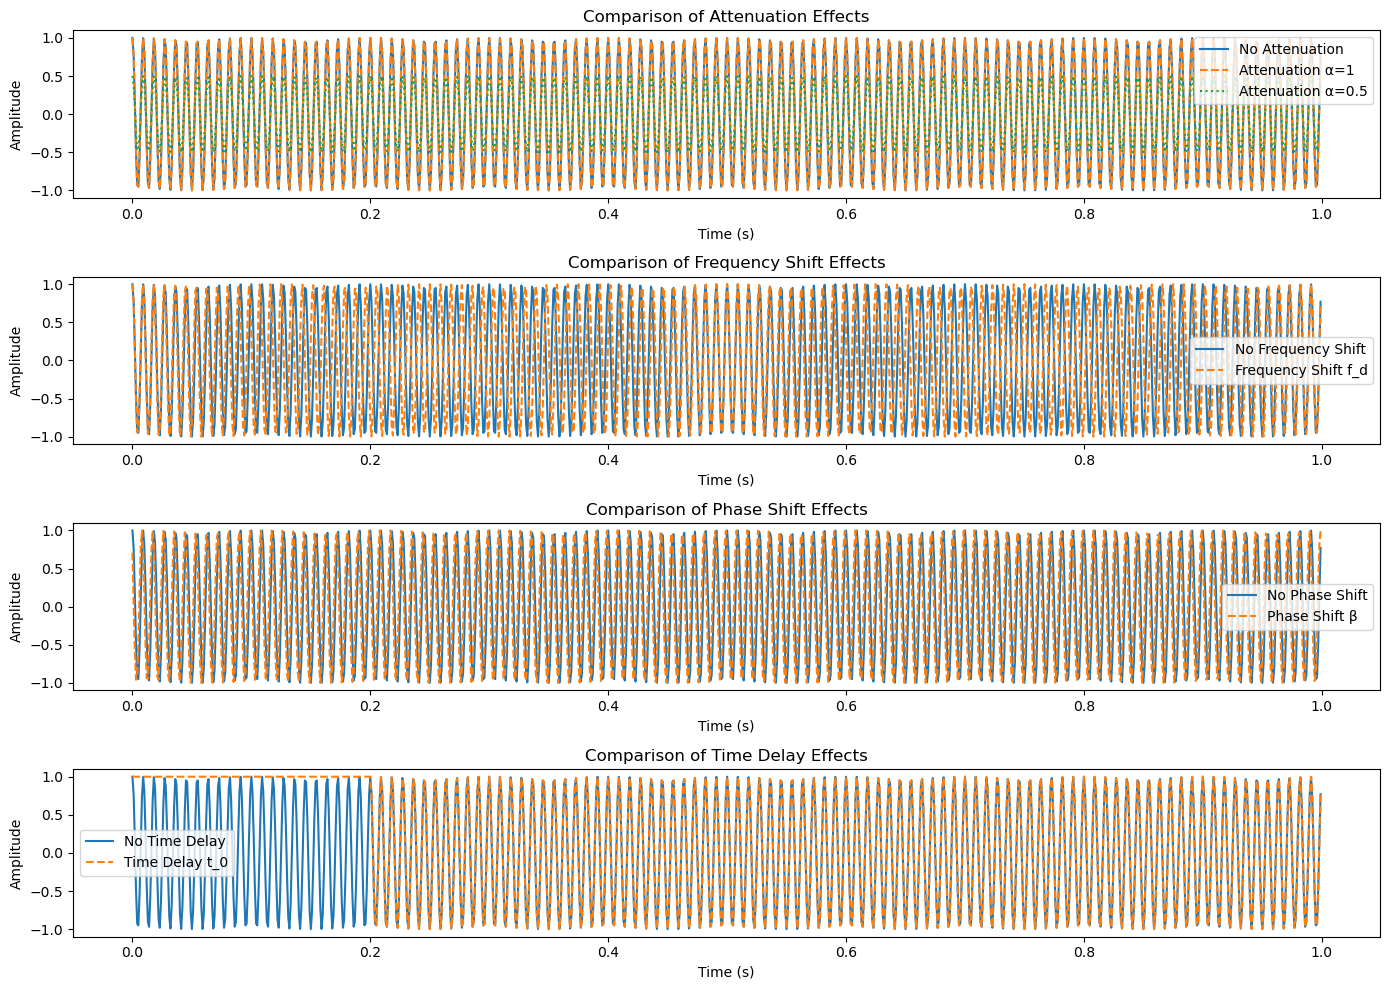

In [2]:
# Different cases for comparison

# 1. No attenuation vs. Attenuation alpha=1 vs. Attenuation alpha=0.5
no_attenuation = a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)
attenuation_alpha_1 = 1.0 * a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)
attenuation_alpha_2 = 0.5 * a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)

# 2. No frequency shift vs. Frequency shift f_d
no_freq_shift = a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)
freq_shift = a_i * np.cos(2 * np.pi * ((f_i + f_d) + fc) * t + phi_i)

# 3. No phase shift vs. Phase shift beta
no_phase_shift = a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)
phase_shift = a_i * np.cos(2 * np.pi * (f_i + fc) * t + (phi_i + beta))

# 4. No time delay vs. Time delay t_0
no_time_delay = a_i * np.cos(2 * np.pi * (f_i + fc) * t + phi_i)
delayed_t_shifted = t - t_0
delayed_t_shifted[delayed_t_shifted < 0] = 0  # Set negative times to zero for delay effect
time_delay = a_i * np.cos(2 * np.pi * (f_i + fc) * delayed_t_shifted + phi_i)

# Plotting each comparison
plt.figure(figsize=(14, 10))

# Attenuation comparison
plt.subplot(4, 1, 1)
plt.plot(t, no_attenuation, label="No Attenuation")
plt.plot(t, attenuation_alpha_1, label="Attenuation α=1", linestyle="--")
plt.plot(t, attenuation_alpha_2, label="Attenuation α=0.5", linestyle=":")
plt.title("Comparison of Attenuation Effects")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Frequency shift comparison
plt.subplot(4, 1, 2)
plt.plot(t, no_freq_shift, label="No Frequency Shift")
plt.plot(t, freq_shift, label="Frequency Shift f_d", linestyle="--")
plt.title("Comparison of Frequency Shift Effects")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Phase shift comparison
plt.subplot(4, 1, 3)
plt.plot(t, no_phase_shift, label="No Phase Shift")
plt.plot(t, phase_shift, label="Phase Shift β", linestyle="--")
plt.title("Comparison of Phase Shift Effects")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Time delay comparison
plt.subplot(4, 1, 4)
plt.plot(t, no_time_delay, label="No Time Delay")
plt.plot(t, time_delay, label="Time Delay t_0", linestyle="--")
plt.title("Comparison of Time Delay Effects")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


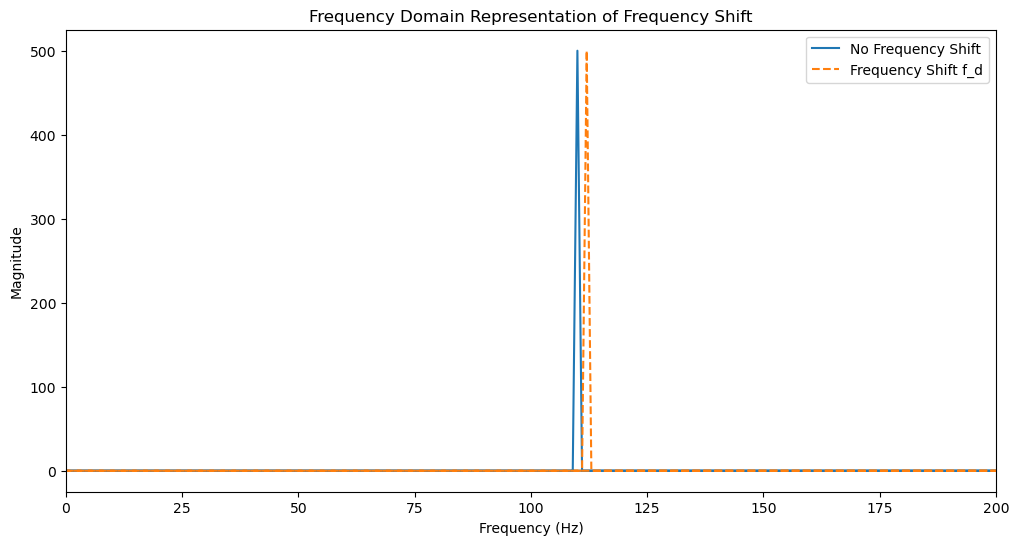

In [3]:
# Compute the Fourier Transform to show frequency domain representation

# Fourier Transform of no frequency shift and frequency shift signals
no_freq_shift_ft = np.fft.fft(no_freq_shift)
freq_shift_ft = np.fft.fft(freq_shift)

# Frequency axis
freqs = np.fft.fftfreq(len(t), 1 / fs)

# Plotting frequency domain representation
plt.figure(figsize=(12, 6))

# Plot the magnitude spectrum for no frequency shift
plt.plot(freqs, np.abs(no_freq_shift_ft), label="No Frequency Shift")

# Plot the magnitude spectrum for frequency shift
plt.plot(freqs, np.abs(freq_shift_ft), label="Frequency Shift f_d", linestyle="--")

plt.xlim(0, 200)  # Limiting x-axis to focus around the carrier frequency
plt.title("Frequency Domain Representation of Frequency Shift")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


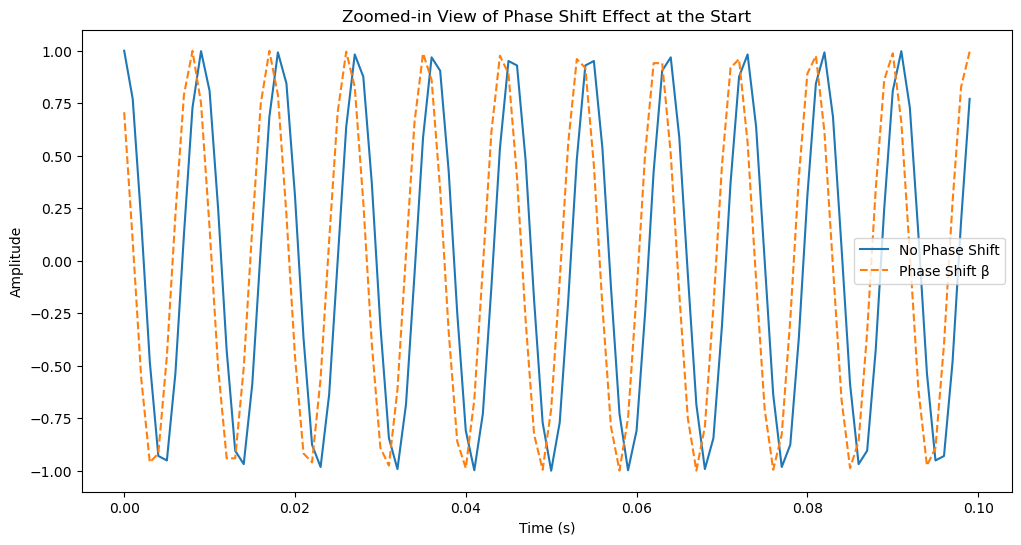

In [4]:
# Zooming in on the starting point to show the phase shift effect

plt.figure(figsize=(12, 6))

# Plotting a zoomed-in view of the time domain signals
plt.plot(t[:100], no_phase_shift[:100], label="No Phase Shift")
plt.plot(t[:100], phase_shift[:100], label="Phase Shift β", linestyle="--")

plt.title("Zoomed-in View of Phase Shift Effect at the Start")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


#### With Additive Noise

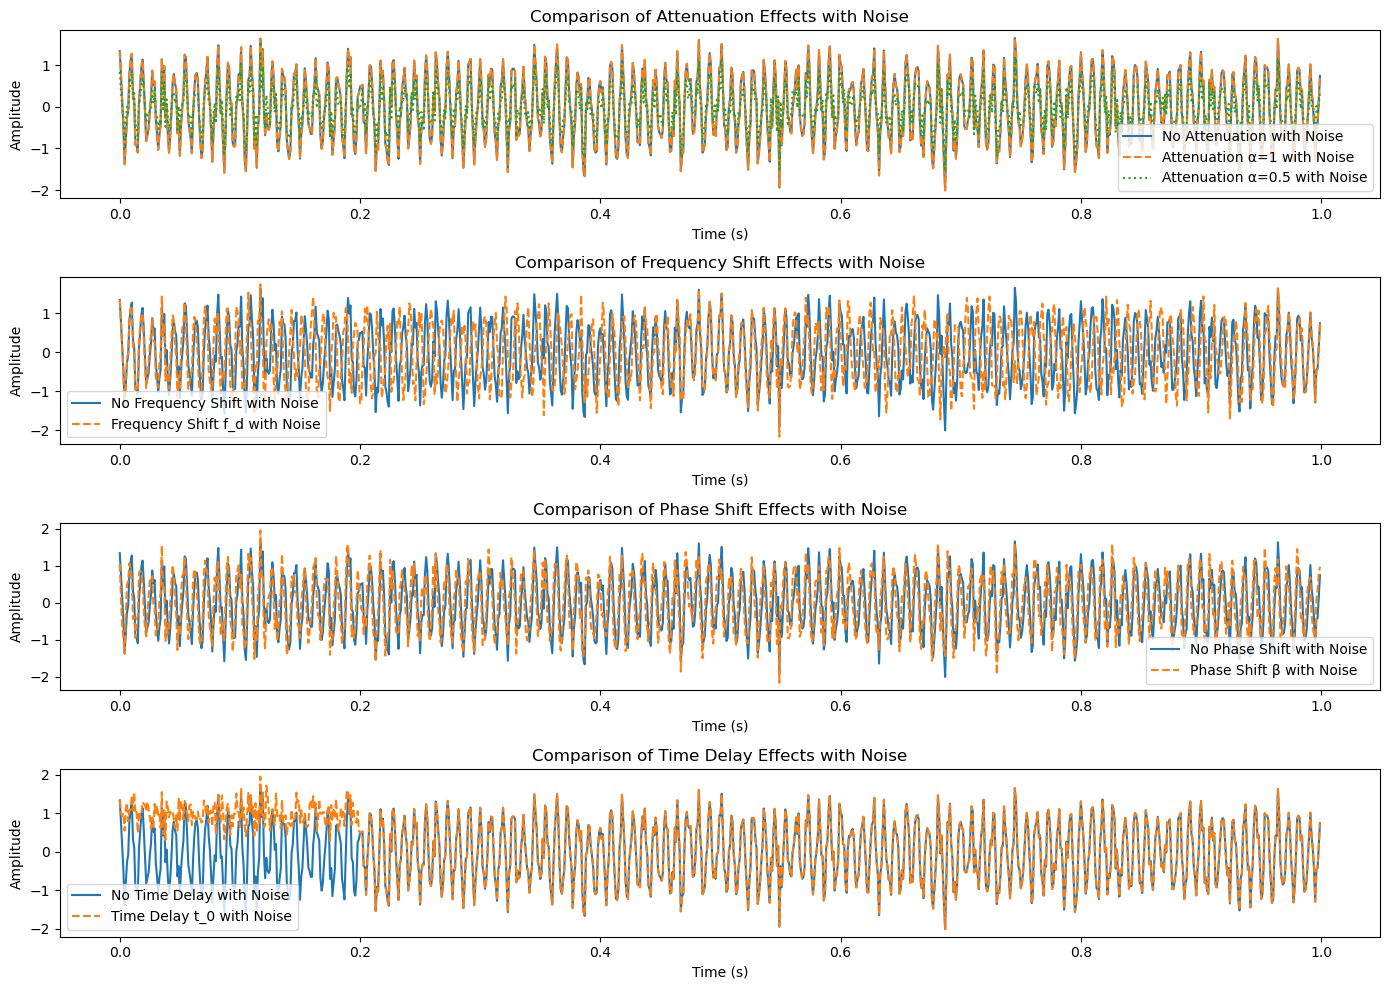

In [5]:
# Define noise parameters
noise_power = 0.1  # Power of Gaussian noise
noise = np.sqrt(noise_power) * (np.random.randn(len(t)) + 1j * np.random.randn(len(t)))  # Complex Gaussian noise

# Add noise to each case in the time domain
no_attenuation_noisy = no_attenuation + np.real(noise)
attenuation_alpha_1_noisy = attenuation_alpha_1 + np.real(noise)
attenuation_alpha_2_noisy = attenuation_alpha_2 + np.real(noise)

no_freq_shift_noisy = no_freq_shift + np.real(noise)
freq_shift_noisy = freq_shift + np.real(noise)

no_phase_shift_noisy = no_phase_shift + np.real(noise)
phase_shift_noisy = phase_shift + np.real(noise)

no_time_delay_noisy = no_time_delay + np.real(noise)
time_delay_noisy = time_delay + np.real(noise)

# Plotting each comparison with noise
plt.figure(figsize=(14, 10))

# Attenuation comparison with noise
plt.subplot(4, 1, 1)
plt.plot(t, no_attenuation_noisy, label="No Attenuation with Noise")
plt.plot(t, attenuation_alpha_1_noisy, label="Attenuation α=1 with Noise", linestyle="--")
plt.plot(t, attenuation_alpha_2_noisy, label="Attenuation α=0.5 with Noise", linestyle=":")
plt.title("Comparison of Attenuation Effects with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Frequency shift comparison with noise
plt.subplot(4, 1, 2)
plt.plot(t, no_freq_shift_noisy, label="No Frequency Shift with Noise")
plt.plot(t, freq_shift_noisy, label="Frequency Shift f_d with Noise", linestyle="--")
plt.title("Comparison of Frequency Shift Effects with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Phase shift comparison with noise
plt.subplot(4, 1, 3)
plt.plot(t, no_phase_shift_noisy, label="No Phase Shift with Noise")
plt.plot(t, phase_shift_noisy, label="Phase Shift β with Noise", linestyle="--")
plt.title("Comparison of Phase Shift Effects with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Time delay comparison with noise
plt.subplot(4, 1, 4)
plt.plot(t, no_time_delay_noisy, label="No Time Delay with Noise")
plt.plot(t, time_delay_noisy, label="Time Delay t_0 with Noise", linestyle="--")
plt.title("Comparison of Time Delay Effects with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


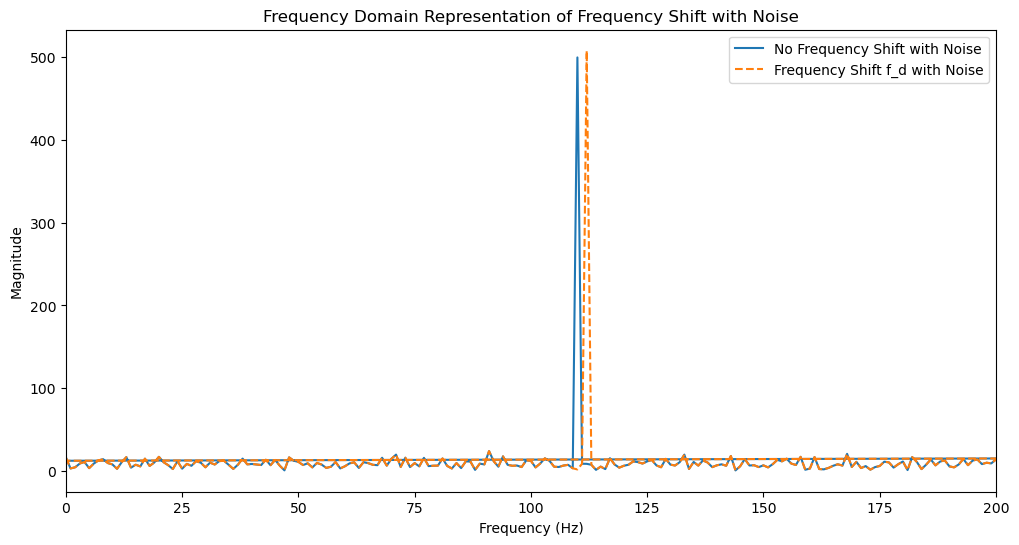

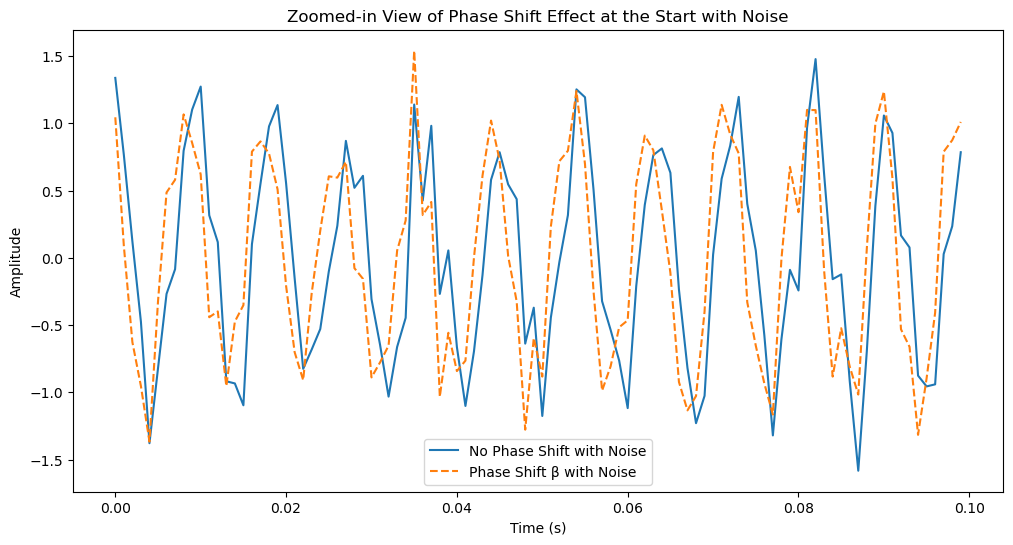

In [6]:
# Fourier Transform of frequency shift cases with noise
no_freq_shift_noisy_ft = np.fft.fft(no_freq_shift_noisy)
freq_shift_noisy_ft = np.fft.fft(freq_shift_noisy)

# Frequency axis
freqs = np.fft.fftfreq(len(t), 1 / fs)

# Plotting frequency domain representation with noise
plt.figure(figsize=(12, 6))
plt.plot(freqs, np.abs(no_freq_shift_noisy_ft), label="No Frequency Shift with Noise")
plt.plot(freqs, np.abs(freq_shift_noisy_ft), label="Frequency Shift f_d with Noise", linestyle="--")
plt.xlim(0, 200)  # Limiting x-axis to focus around the carrier frequency
plt.title("Frequency Domain Representation of Frequency Shift with Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Zooming in on the starting point for phase shift with noise
plt.figure(figsize=(12, 6))
plt.plot(t[:100], no_phase_shift_noisy[:100], label="No Phase Shift with Noise")
plt.plot(t[:100], phase_shift_noisy[:100], label="Phase Shift β with Noise", linestyle="--")
plt.title("Zoomed-in View of Phase Shift Effect at the Start with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


### Optimal Continuous-Time Correlation Receiver when Parameters are Known

We consider an **optimal continuous-time correlation receiver** under the assumption that all channel impairments ($ \alpha $, $ f_d $, $ \beta $, $ t_0 $) are fully known. 

The receiver can then effectively "cancel out" or compensate for these effects, allowing it to better focus on distinguishing between the two hypotheses, $ H_0 $ and $ H_1 $, even in the presence of noise.

For example, if the noise is white, and all of these parameters are known, then an optimal continuous-time correlation receiver is shown in Figure 6.1, where $ U_i $ is the decision variable under hypothesis $ H_i $. 

![Fig 6.1](./Figures/fig_6_1.png)

#### Receiver's Operation

**Initial Multiplier for Frequency and Phase Offset Correction**

The received signal is first passed through a multiplier designed to eliminate the frequency offset $ f_d $ (caused by Doppler shift or similar effects) and the phase offset $ \beta $ (caused by initial phase differences). 

This step adjusts the received signal to be in sync with the expected signal in both frequency and phase, that is why we have the coherence and non-coherence problems. 

By removing $ f_d $ and $ \beta $, the receiver prevents these offsets from causing detection errors or inaccuracies in phase-sensitive modulation schemes.

**Correlator Using Known Attenuation $ \alpha $**

The correlator uses the known attenuation $ \alpha $, which scales the received signal’s amplitude based on the expected signal strength reduction. 

In practical terms, this means the receiver is adapted to handle different signal strengths, allowing it to make more precise comparisons under either hypothesis. 

The known attenuation ensures that the decision process is not biased by variations in received signal amplitude.

**Integrate-and-Dump Circuits Using Known Time Offset $ t_0 $**

Integration over the duration of the signal is aligned with the time offset $ t_0 $, which ensures that the receiver’s integration period exactly matches the signal’s arrival timing.

By accounting for $ t_0 $, the receiver synchronizes accurately with the received signal, which is essential for optimal detection, as integration over the correct interval maximizes the signal-to-noise ratio.

**Neglecting Bias and $ \alpha $ in Equal-Energy Cases**

If the signal energies $ \mathcal{E}_0 $ and $ \mathcal{E}_1 $ are equal, bias terms related to energy differences become irrelevant. 

Additionally, the constant multiplier $ \alpha $ can be neglected because its uniform effect on both hypotheses does not influence the decision.

This simplification reduces the receiver’s complexity without sacrificing performance when signal energies are equal, allowing it to focus purely on the correlation-based decision variable $ U_i $.

### Coherent vs. Non-Coherent Detection

In an **optimal correlation receiver** where the parameters $ f_d $ and $ \beta $ (frequency and phase offsets) are known, the receiver can indeed adjust the received signal to be in sync with the expected signal in both **frequency** and **phase**. 

This adjustment enables **coherent detection** because the receiver has precise knowledge of these parameters and can use that information to compensate for any offsets, ensuring alignment with the transmitted signal.

- **Coherent Detection**: Requires the receiver to have full knowledge of the phase and frequency offsets, allowing it to align precisely with the phase of the transmitted signal. 
  
- **Non-Coherent Detection**: Occurs when the receiver does not have full knowledge of the phase offset (or cannot accurately track it) and thus cannot achieve phase alignment. 

#### Detection Problem

We have some **detection challenges** when parameters like amplitude $ \alpha $, frequency offset $ f_d $, phase offset $ \beta $, and time delay $ t_0 $ are **unknown** or **random**.

When these parameters are either inherently stochastic or too difficult/expensive to measure, it poses significant challenges in accurately detecting and demodulating the received signal. 

**Unknown Parameters**

When some or all of these parameters are unknown, the receiver cannot fully align with the received signal in terms of amplitude, frequency, phase, or timing. 

This misalignment can lead to errors in decoding, as the receiver no longer has access to the optimal detection strategies that would otherwise correct for these effects.

**Stochastic (Random) Parameters**

If parameters such as frequency offset or phase shift are random variables, they may vary unpredictably from one transmission to the next. 

For instance, random Doppler shifts or unpredictable **phase noise** could alter the signal characteristics over time.

Stochastic parameters introduce additional uncertainty, which complicates the detection process since the receiver cannot simply apply fixed compensations for these effects. 

**Estimation vs. Detection**:

While it is theoretically possible to estimate these random parameters, doing so could require complex algorithms, additional computational resources, or high-precision equipment—all of which might be impractical or costly.

So, when there is a situation where parameter estimation is infeasible, leading to a **non-coherent detection problem** where the receiver operates without detailed knowledge of the impairments. 

This scenario requires alternative detection techniques that do not rely on exact phase or frequency information.

Non-coherent methods typically rely on envelope detection, differential detection, or energy-based metrics, which are more robust to unknown phase and frequency shifts but generally result in lower detection performance compared to coherent methods.

### Matlab example
- [Gigasamples-per-Second Correlator and Peak Detector](https://www.mathworks.com/help/dsphdl/ug/gigasample-correlator-peak-detector.html)
- [Triggered Capture Using Energy Detection](https://www.mathworks.com/help/wireless-testbench/gs/triggered-capture-using-energy-detection.html)

### References

The contents of the sections in this chapter are based on the following materials.

* T. Schonhoff and A. Giordano, _Detection and Estimation Theory and its Applications_. Prentice Hall, 2006 , Chapter 6